<a href="https://colab.research.google.com/github/dylanahola/Food-Sales-Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
sales_df = pd.read_csv('/content/drive/MyDrive/sales_predictions.csv')
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#I believe that there are 2410 non null in the Outlet_size column that I'll need to clean up.
#There is also  1463 non null in the item weight column
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
sales_df['Item_Weight'].head(20)

#My brain works well when looking at things like a checklist to work through 
#So first I'm going to look for any:
#Irrelevent data
#Duplicates 
#Unit inconsistencies 
#Missing Data

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
Name: Item_Weight, dtype: float64

In [6]:
#Irrelevant data .. I think that the item identifier and outlet identifier columns can be removed because they're both unique to each row.
sales_df.drop(columns= 'Item_Identifier', inplace = True) 
sales_df.drop(columns= 'Outlet_Identifier', inplace = True)

In [7]:
#Duplicates .. looks like there aren't any to worry about.
sales_df.duplicated().any()

False

In [8]:
#Unit inconsistencies ..
#As far as I can tell the non null values in my data aren't caused by a unit inconsistency 
sales_df['Item_Weight'].head(20)

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
Name: Item_Weight, dtype: float64

In [9]:
sales_df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [10]:
#Missing Data
#There is missing data in both item weight and outlet size. 
#I decided that there's enough missing values in the outlet size column to drop it
sales_df.drop(columns = ['Outlet_Size'], inplace = True)

In [11]:
weight_mean = sales_df['Item_Weight'].mean()

In [12]:
sales_df.fillna(weight_mean, inplace = True)

In [13]:
#I didn't think there was enough missing data in the item weight column to droip it
#So I decided to fill the na values with the mean of the column

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [15]:
visibility = sales_df['Item_Visibility']
outletsales = sales_df['Item_Outlet_Sales']
itemtype = sales_df['Item_Type']
itemweight = sales_df['Item_Weight']
itemfat = sales_df['Item_Fat_Content']
itemMRP = sales_df['Item_MRP']
locationtype = sales_df['Outlet_Location_Type']


In [16]:
itemtype2 = sales_df['Item_Type'].sort_values(ascending = True)
itemtype2

4261     Baking Goods
5387     Baking Goods
5363     Baking Goods
5362     Baking Goods
5354     Baking Goods
            ...      
7353    Starchy Foods
7363    Starchy Foods
136     Starchy Foods
6723    Starchy Foods
5237    Starchy Foods
Name: Item_Type, Length: 8523, dtype: object

In [17]:
#My thought was that by finding the max retail price for different categories, we could find which categories
#have the most potential contribution to overall sales. Thus providing some information on where to focus.

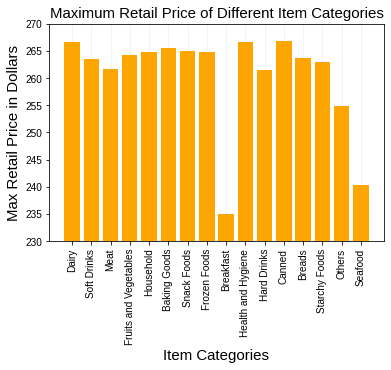

In [18]:
plt.bar(itemtype , itemMRP, color = 'orange');
plt.style.use('seaborn');
plt.xticks(rotation = 90);
plt.grid(axis = 'x' , alpha = 0.2);
plt.ylim(bottom = 230, top = 270);
plt.title('Maximum Retail Price of Different Item Categories', fontsize = 15);
plt.ylabel('Max Retail Price in Dollars', fontsize = 15);
plt.xlabel('Item Categories', fontsize = 15);

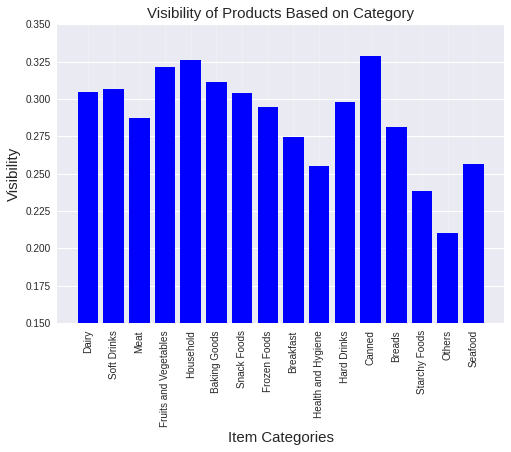

In [19]:
plt.bar(itemtype , visibility, color = 'blue');
plt.style.use('seaborn');
plt.xticks(rotation = 90);
plt.grid(axis = 'x' , alpha = 0.2);
plt.ylim(bottom = 0.15, top = 0.35);
plt.title('Visibility of Products Based on Category', fontsize = 15);
plt.ylabel('Visibility', fontsize = 15);
plt.xlabel('Item Categories', fontsize = 15);

In [20]:
#I went through the inputs of the Item Fat Column and cleaned up the data. There were some spelling differences that produced seperate variables.
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['low fat'], 'Low Fat')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['LF'], 'Low Fat')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['reg'], 'Regular')

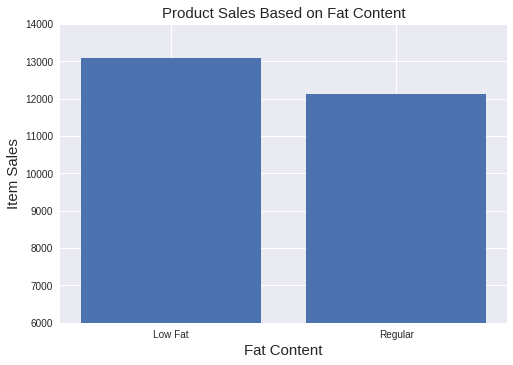

In [21]:
plt.bar(itemfat, outletsales)
plt.ylim(bottom = 6000, top = 14000)
plt.title('Product Sales Based on Fat Content', fontsize = 15);
plt.ylabel('Item Sales', fontsize = 15);
plt.xlabel('Fat Content', fontsize = 15);

In [22]:
sales_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [23]:
sales_df.corr().sort_values(by = ['Item_Outlet_Sales'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


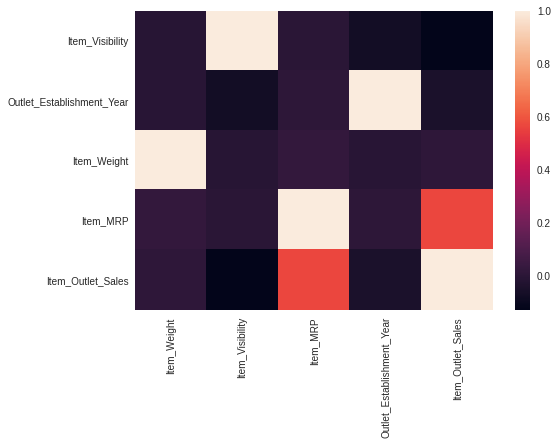

In [24]:
#I decided to take the sorted set of correlations and get a better look using a heatmap display.
sns.heatmap(sales_df.corr().sort_values(by = ['Item_Outlet_Sales']));

In [25]:
#The heatmap shows that the only two variables that have a correlation are the Item's Max retail price and the item outlet sales.

In [26]:
sales_df['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.560000        2
9.420000        1
5.400000        1
6.520000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64

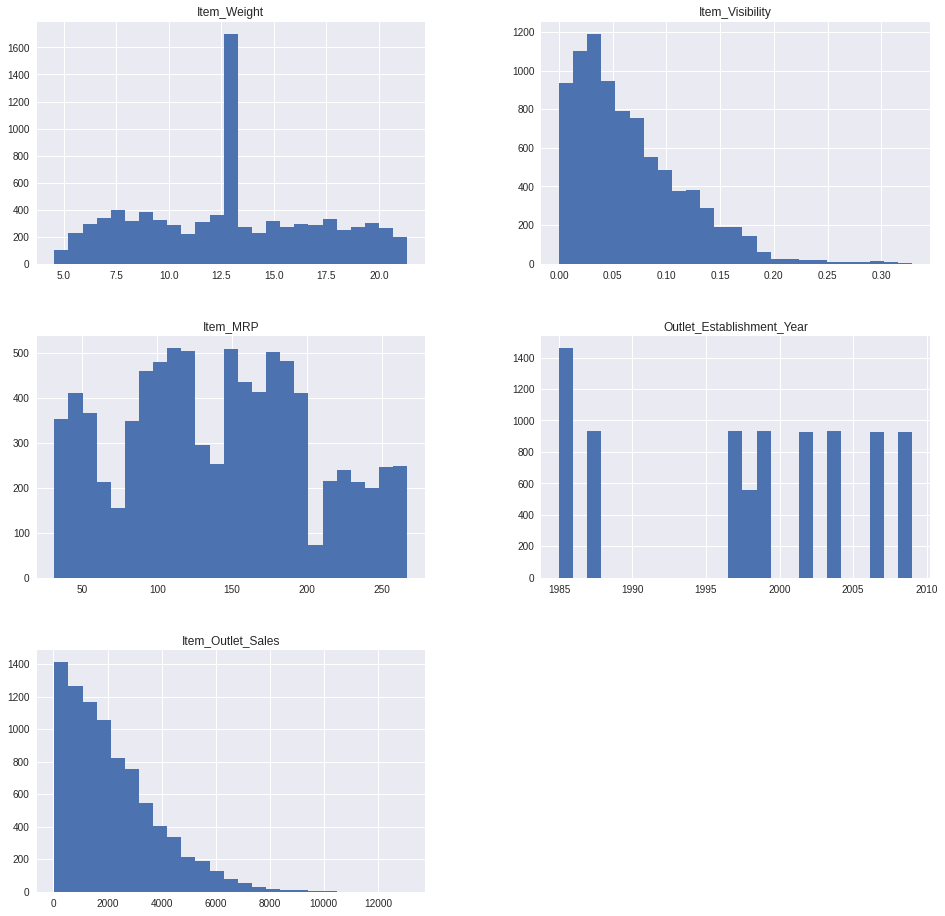

In [27]:
#Using histograms to get a better look at the data I was able to see an unusual amount of data points items with
sales_df.loc[:,:].hist(bins=25, figsize= (16,16));

In [28]:
#Using histograms to get a better look at the data I was able to see an unusual spike in data entries for items with the weight of 12.8
#After some analysis I realized with the help of my peers, this is because the method that I used to fill the missing data entries was filling with the mean.

In [29]:
#Next I'm going to be putting together a K-Nearest Neighbor Model for the dataframe to predict Outlet_Sales

In [30]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [31]:
sales_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [32]:
sales_dummies = pd.get_dummies(sales_df, columns = ['Item_Fat_Content', 'Item_Type','Outlet_Type'], drop_first = True)

In [33]:
sales_dummies.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,Tier 1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,Tier 3,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,Tier 1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,Tier 3,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,Tier 3,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [34]:
sales_df = sales_dummies

In [35]:
sales_df['Outlet_Location_Type']

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [36]:
loctype = {'Tier 1':0,'Tier 2':1,'Tier 3':2}

In [37]:
sales_df['Outlet_Location_Type'] = sales_df['Outlet_Location_Type'].map(loctype)

In [38]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Outlet_Location_Type             8523 non-null   int64  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Breads                 8523 non-null   uint8  
 8   Item_Type_Breakfast              8523 non-null   uint8  
 9   Item_Type_Canned                 8523 non-null   uint8  
 10  Item_Type_Dairy                  8523 non-null   uint8  
 11  Item_Type_Frozen Foods           8523 non-null   uint8  
 12  Item_Type_Fruits and

In [39]:
#NMow that all of the categorical values have been handled, we can start with the KNN regression model. 

In [40]:
X = sales_df.drop(columns = 'Item_Outlet_Sales')
y = sales_df['Item_Outlet_Sales']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)